# Projeto de Machine Learning

Marcelo Cesário Miguel

William Augusto Reis da Silva

In [1]:
import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import cv2, 
import random
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score,f1_score
import os
from tensorflow.keras import layers


In [2]:
np.random.seed(20)
ROWS = 150
COLS = 150
CHANNELS = 3

BATCH_SIZE=128


In [3]:
TRAIN_SCISSOR = []
TRAIN_ROCK = []
TRAIN_PAPER = []
TEST_IMAGES = []
Dir = './rock_paper_scissors/'
for i in os.listdir(Dir):
    for j in os.listdir(Dir+i):
        dir_image = f"{Dir}{i}/{j}"
        if i == 'scissors':
            TRAIN_SCISSOR.append(dir_image)
        elif i == 'rock':
            TRAIN_ROCK.append(dir_image)
        else:
            TRAIN_PAPER.append(dir_image)
print(len(TRAIN_PAPER) + len(TRAIN_ROCK)+len(TRAIN_SCISSOR))

2188


In [4]:
TEST_IMAGES = TRAIN_SCISSOR[int(len(TRAIN_SCISSOR)*0.8):] + TRAIN_ROCK[int(len(TRAIN_ROCK)*0.8):] + TRAIN_PAPER[int(len(TRAIN_PAPER)*0.8):]

In [5]:
len(TEST_IMAGES)

439

In [6]:
TRAIN_SCISSOR = TRAIN_SCISSOR[:int(len(TRAIN_SCISSOR)*0.8)]
TRAIN_ROCK = TRAIN_ROCK[:int(len(TRAIN_ROCK)*0.8)]
TRAIN_PAPER = TRAIN_PAPER[:int(len(TRAIN_PAPER)*0.8)]

In [7]:
print(len(TRAIN_PAPER) + len(TRAIN_ROCK)+len(TRAIN_SCISSOR) + len(TEST_IMAGES))

2188


In [8]:
TRAIN_IMAGES = TRAIN_PAPER+ TRAIN_ROCK + TRAIN_SCISSOR
random.shuffle(TRAIN_IMAGES)
random.shuffle(TEST_IMAGES)

In [9]:
len(TRAIN_IMAGES)
TRAIN_IMAGES[0]

'./rock_paper_scissors/paper/2OCAZGNv2OEzgAwU.png'

In [10]:
def plot_arr(arr):
    plt.figure()
    plt.imshow(image.array_to_img(arr))
    plt.show()

def plot(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

In [11]:
def prep_data(images):
    count = len(images)
    X = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.float32)
    y = np.zeros((count,), dtype=np.float32)
    print("Starting")
    for i, image_file in enumerate(images):
        img = image.load_img(image_file, target_size=(ROWS, COLS))
        X[i] = image.img_to_array(img)
        if '/scissors/' in image_file:
            y[i] = 1.
        elif '/paper/' in image_file:
            y[i] = 2.
    
        i+=1
        if i == count:
            print('Processed {} of {}'.format(i, count))
        else:
            if i%1000 == 0: print('Processed {} of {}'.format(i, count))
        
    return X, y


In [12]:
X_train, y_train = prep_data(TRAIN_IMAGES)
X_test, y_test = prep_data(TEST_IMAGES)

Starting
Processed 1000 of 1749
Processed 1749 of 1749
Starting
Processed 439 of 439


In [ ]:
image.load_img("./rock_paper_scissors/paper/.png", target_size=(ROWS, COLS))

In [98]:
img = image.load_img("./rock_paper_scissors/paper/teste.png", target_size=(ROWS, COLS))
bla = image.img_to_array(img)

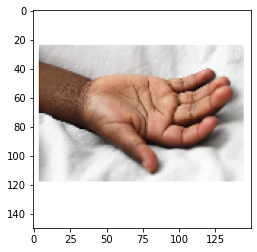

In [99]:
plot_arr(bla)

In [101]:
bla = bla[np.newaxis, :]
bla.shape

(1, 150, 150, 3)

In [102]:
model.predict(bla)

array([[0., 0., 1.]], dtype=float32)

In [13]:
print(y_train)

[2. 1. 0. ... 1. 0. 1.]


In [14]:
image_datagen = image.ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = image_datagen.flow(
    X_train,
    y_train,
    batch_size=BATCH_SIZE)


In [16]:
test_generator = image_datagen.flow(
    X_test,
    y_test,
    batch_size=BATCH_SIZE)

In [17]:
def plot_images(datagen):
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = datagen.next()
        # convert to unsigned integers for viewing
        image_ = batch[0]
        # plot raw pixel data
        plt.imshow(image_[0])
    plt.show()

In [18]:
X_train[0].shape

(150, 150, 3)

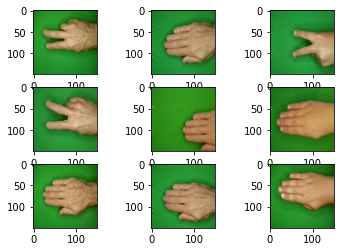

In [19]:
plot_images(train_generator)

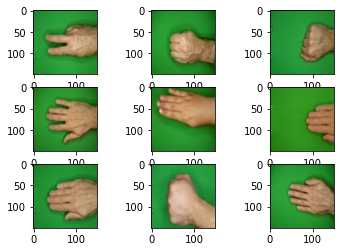

In [20]:
plot_images(test_generator)

In [21]:
X_train.shape

(1749, 150, 150, 3)

In [39]:
num_classes = 3

model = Sequential([
  layers.Conv2D(16, (3, 3), padding='valid', input_shape=(ROWS, COLS, CHANNELS)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

# def create_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(ROWS, COLS, CHANNELS)))
#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
# #     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
# #     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
# #     model.add(MaxPooling2D(pool_size=(2,2)))
# #     model.add(Conv2D(256, (3, 3), activation='relu'))
# #     model.add(Conv2D(256, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     # model.add(Dropout(0.5))

#     model.add(Flatten())
#     model.add(Dropout(0.5))
#     model.add(Dense(512, activation='relu'))
#     # model.add(Dense(1024, activation='relu'))
#     # model.add(Dense(1000, activation='relu'))
#     # model.add(Dropout(0.5))
#     model.add(Dense(3, activation='sigmoid'))
    
#     return model

In [40]:
# model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [42]:
epochs=10
history = model.fit(
  train_generator,
  validation_data=test_generator,
  epochs=epochs
)


Epoch 1/10
14/14 [==============================] - 19s 1s/step - loss: 0.9338 - accuracy: 0.5866 - val_loss: 0.5895 - val_accuracy: 0.7813
Epoch 2/10
14/14 [==============================] - 17s 1s/step - loss: 0.4672 - accuracy: 0.8491 - val_loss: 0.4155 - val_accuracy: 0.8747
Epoch 3/10
14/14 [==============================] - 23s 2s/step - loss: 0.3038 - accuracy: 0.9011 - val_loss: 0.2583 - val_accuracy: 0.9180
Epoch 4/10
14/14 [==============================] - 24s 2s/step - loss: 0.1985 - accuracy: 0.9342 - val_loss: 0.1888 - val_accuracy: 0.9294
Epoch 5/10
14/14 [==============================] - 23s 2s/step - loss: 0.1183 - accuracy: 0.9571 - val_loss: 0.2174 - val_accuracy: 0.9112
Epoch 6/10
14/14 [==============================] - 28s 2s/step - loss: 0.0854 - accuracy: 0.9731 - val_loss: 0.1193 - val_accuracy: 0.9499
Epoch 7/10
14/14 [==============================] - 24s 2s/step - loss: 0.0652 - accuracy: 0.9760 - val_loss: 0.1166 - val_accuracy: 0.9590
Epoch 8/10
14/14 [==

In [26]:
model.save('rock_paper_scissor.h5')

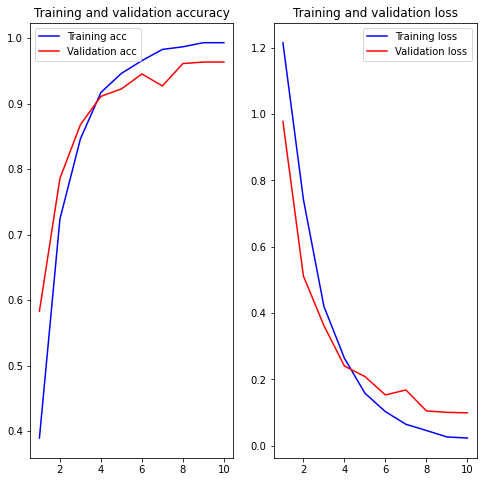

In [27]:
#acc = history.history['acc']
#val_acc = history.history['val_acc']
plt.figure(figsize=(8, 8))



loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
image = ""

In [90]:
y_test[0]

1.0

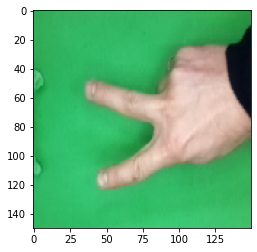

In [87]:
plot_arr(X_test[0])

In [88]:
predictions = model.predict(X_test)
predictions[0]

array([0., 1., 0.], dtype=float32)

[0. 1. 0.]
I am 100.00% sure this is a scissor


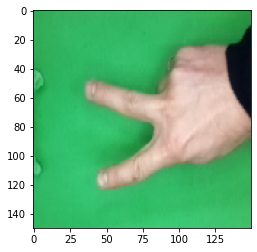

[0. 1. 0.]
I am 100.00% sure this is a scissor


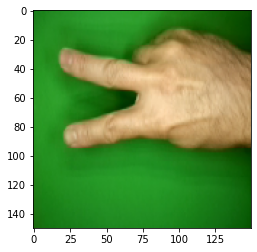

[0. 0. 1.]
I am 100.00% sure this is a paper


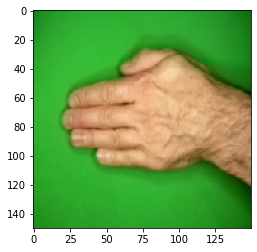

[1. 0. 0.]
I am 100.00% sure this is a rock


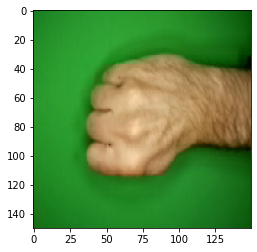

[0. 1. 0.]
I am 100.00% sure this is a scissor


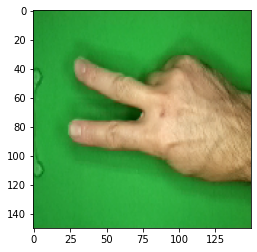

[0. 1. 0.]
I am 100.00% sure this is a scissor


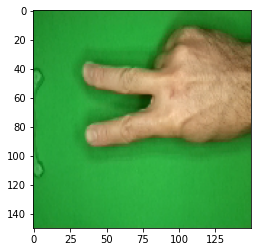

[1. 0. 0.]
I am 100.00% sure this is a rock


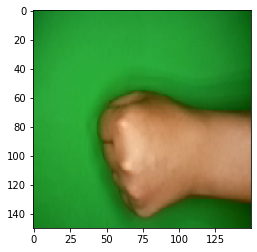

[0. 1. 0.]
I am 100.00% sure this is a scissor


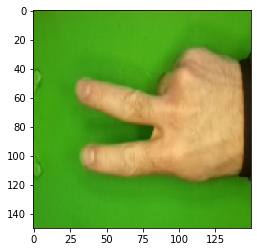

[0. 1. 0.]
I am 100.00% sure this is a scissor


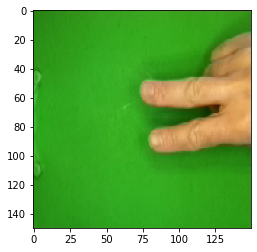

[0. 0. 1.]
I am 100.00% sure this is a paper


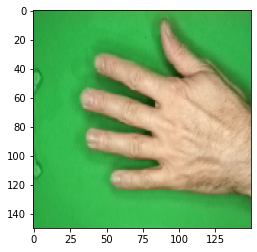

In [91]:
for i in range(0,10):
    score = predictions[i]
    if np.argmax(score) == 0:
        formato = "rock"
    elif np.argmax(score) == 1:
        formato = "scissor"
    else:
        formato = "paper"
    print(score)
    print('I am {:.2%} sure this is a {}'.format(np.max(score),formato))
    plt.imshow(image.array_to_img(X_test[i]))
    plt.show()


In [92]:
def find_format(score):
    if np.argmax(score) == 0:
        formato = "rock"
    elif np.argmax(score) == 1:
        formato = "scissor"
    else:
        formato = "paper"
    return formato
def check_winner(format1,format2):
    vencedor = 0
    if format1 == format2:
        return 0
    if (format1 == "rock" and format2 == "scissor") or (format1 =="scissor" and format2 == "paper") or (format1 == "paper" and format2 =="rock"):
        return 1
    return 2

scissor
scissor
0


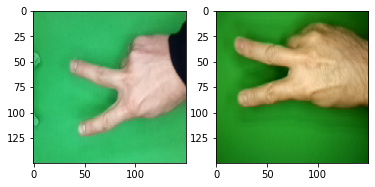

paper
rock
1


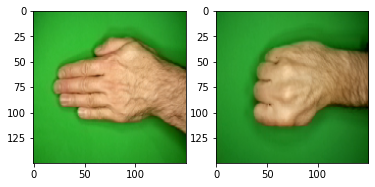

scissor
scissor
0


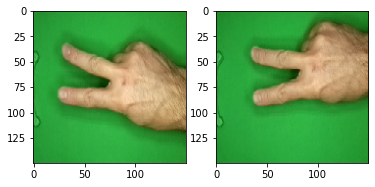

rock
scissor
1


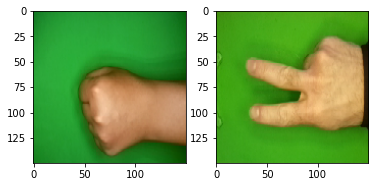

scissor
paper
1


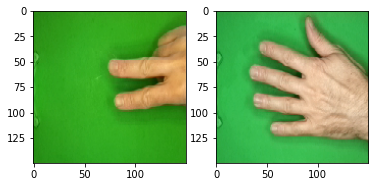

rock
scissor
1


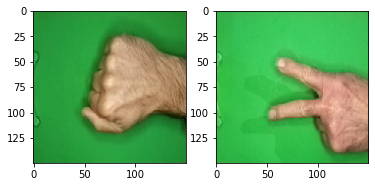

scissor
rock
2


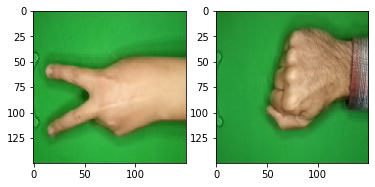

scissor
rock
2


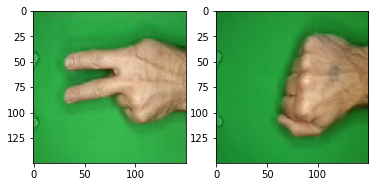

scissor
rock
2


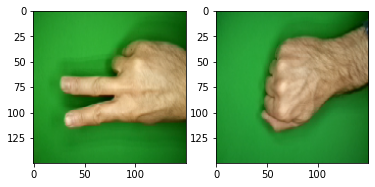

scissor
scissor
0


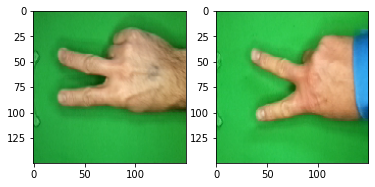

scissor
scissor
0


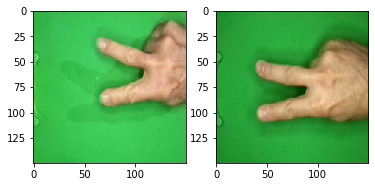

rock
paper
2


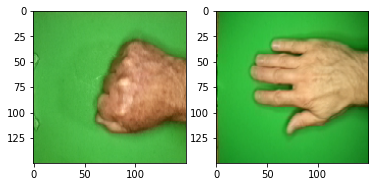

rock
rock
0


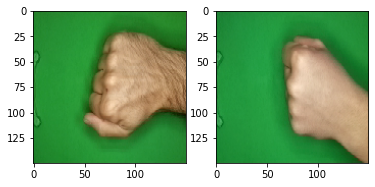

rock
paper
2


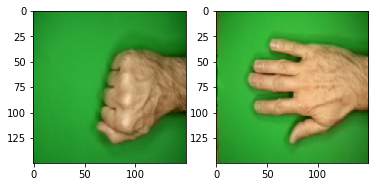

rock
rock
0


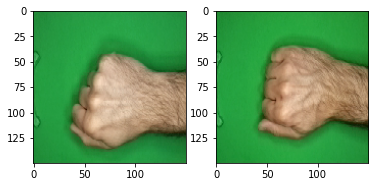

In [94]:
for i in range(0,30,2):
    score1 = predictions[i]
    score2 = predictions[i+1]
    format1 = find_format(score1)
    format2 = find_format(score2)
    winner = check_winner(format1,format2)
    print(format1)
    print(format2)
    print(winner)
    plt.subplot(1, 2, 1)
    plt.imshow(image.array_to_img(X_test[i]))
    plt.subplot(1, 2, 2)
    plt.imshow(image.array_to_img(X_test[i+1]))
    plt.show()
